In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df1 = pd.read_csv('Dati_emigrazione_estero.csv')
df2 = pd.read_csv('Dati_immigrazione_estero.csv')
df3 = pd.read_csv('Dati_emigrazione_italia_estero_per_regioni.csv')
df4 = pd.read_csv('Dati_immigrazione_estero_per_regioni.csv')
df5 = pd.read_csv('Dati_tasso_disoccupazione_per_regioni.csv')
df6 = pd.read_csv('Dati_popolazione_per_regioni.csv')
df7 = pd.read_csv('Dati_povertà_famiglie.csv')
df8 = pd.read_csv('Dati_tasso_occupazione_per_regioni.csv')

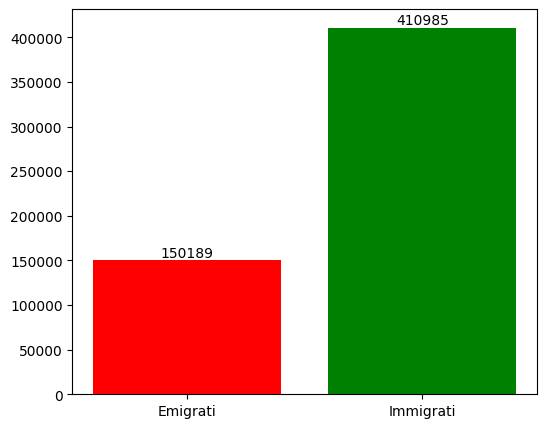

In [16]:

#E' stata eseguita un'analisi sui dati sull'immigrazione e l'emigrazione in Italia nel 2022.
#L'obiettivo è confrontare i flussi migratori in Italia dei principali continenti tramite un grafico a barre.

# Dati da cercare all'interno del DataFrame.
Territori_da_cercare = ['Africa', 'Oceania', 'Europa', 'Asia', 'America']
Cittadinanza = ['Totale']
Sesso_1= ['totale']
Età = ['TOTAL'] 
Età_2=['totale']

# Filtra il DataFrame df1 in base ai criteri specificati.
dati_filtrati_1 = df1[(df1['Stato estero di  destinazione'].isin(Territori_da_cercare)) &
                      (df1['Paese di cittadinanza'].isin(Cittadinanza)) &
                      (df1['Sesso'].isin(Sesso_1)) &
                      (df1['ETA1'].isin(Età))
                      ]

# Filtra il DataFrame df2 in base ai criteri specificati.
dati_filtrati_2 = df2[(df2['Stato estero di provenienza'].isin(Territori_da_cercare)) &
                      (df2['Paese di cittadinanza'].isin(Cittadinanza)) &
                      (df2['Sesso'].isin(Sesso_1)) &
                      (df2['Età'].isin(Età_2))
                      ]


# Concatena le righe filtrate in un unico DataFrame.
dati_completi_1 = pd.concat([dati_filtrati_1])
dati_completi_2 = pd.concat([dati_filtrati_2])

# Calcola la somma della colonna 'Value' nei DataFrame.
somma_1 = dati_completi_1['Value'].sum()
somma_2 = dati_completi_2['Value'].sum()

# Crea una lista contenente le somme calcolate.
sum_values = [somma_1, somma_2]

# Crea un diagramma a barre.
plt.figure(figsize=(6, 5))
labels = ['Emigrati', 'Immigrati']
colori = ['red', 'green']
bars = plt.bar(labels, sum_values, color=colori)

# Aggiunge etichette numeriche sopra le barre nel diagramma a barre.
for bar, value in zip(bars, sum_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')
    

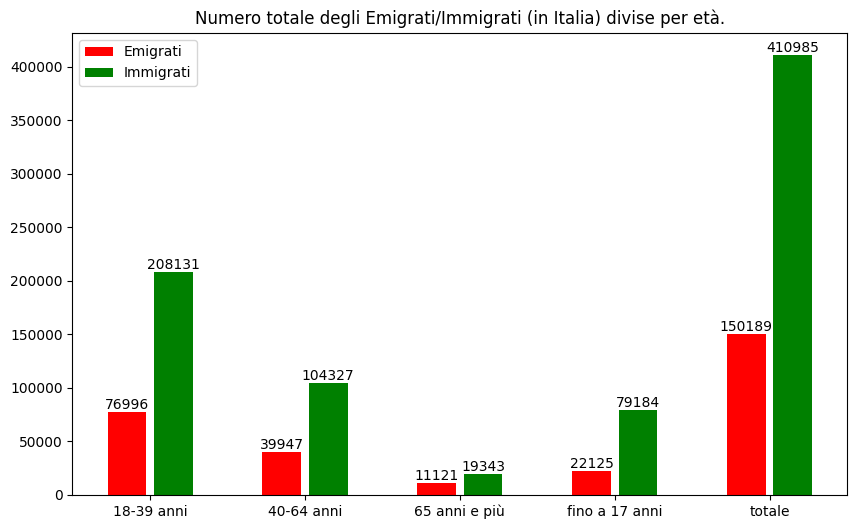

In [17]:
#Questo codice analizza le fasce di età predominanti 
#tra coloro che arrivano in Italia e tra gli italiani che lasciano il paese,

# Dati da cercare all'interno del DataFrame.
Territori_da_cercare = ['Africa', 'Oceania', 'Europa', 'Asia', 'America']
Cittadinanza = ['Totale']
Sesso_1= ['totale']

# Filtra il DataFrame df1 in base ai criteri specificati.
dati_filtrati_1 = df1[(df1['Stato estero di  destinazione'].isin(Territori_da_cercare)) &
                      (df1['Paese di cittadinanza'].isin(Cittadinanza)) &
                      (df1['Sesso'].isin(Sesso_1))
                      ]

# Filtra il DataFrame df2 in base ai criteri specificati.
dati_filtrati_2 = df2[(df2['Stato estero di provenienza'].isin(Territori_da_cercare)) &
                      (df2['Paese di cittadinanza'].isin(Cittadinanza)) &
                      (df2['Sesso'].isin(Sesso_1))
                      ]

# Concatena le righe filtrate in un unico DataFrame.
dati_completi_1 = pd.concat([dati_filtrati_1])
dati_completi_2 = pd.concat([dati_filtrati_2])

# Calcola la somma della colonna 'Value' divisa per età nei DataFrame.
somma_1 = dati_completi_1.groupby('Età')['Value'].sum()
somma_2 = dati_completi_2.groupby('Età')['Value'].sum()

# Crea una lista contenente le somme calcolate.
somma_totale = somma_1.add(somma_2, fill_value=0)

# Crea un diagramma a barre.
plt.figure(figsize=(10, 6))

larghezza_barre_1 = 0.25
larghezza_barre_2 = 0.25
spazio_tra_colonne = 0.05

n = len(somma_totale)
posizioni = np.arange(n)

bars_1 = plt.bar( (posizioni - larghezza_barre_1 / 2 - spazio_tra_colonne / 2), somma_1, width=larghezza_barre_1, alpha=1, label='Emigrati', color='red')
bars_2 = plt.bar( (posizioni + larghezza_barre_2 / 2 + spazio_tra_colonne / 2), somma_2, width=larghezza_barre_2, alpha=1, label='Immigrati', color='green')

plt.xticks(posizioni, somma_totale.index)
plt.title('Numero totale degli Emigrati/Immigrati (in Italia) divise per età.')
plt.legend()

# Aggiunge etichette numeriche sopra le barre nel diagramma a barre.
for bars, values in zip([bars_1, bars_2], [somma_1, somma_2]):
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.show()

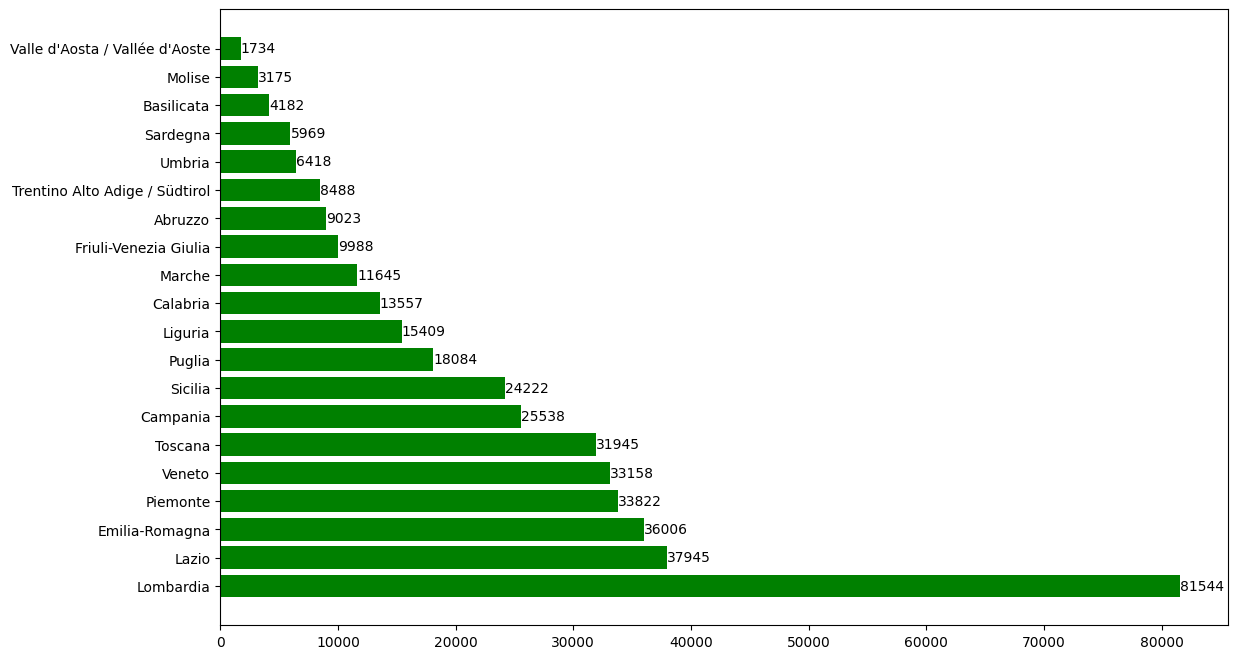

In [18]:

#Questo codice genera un grafico che analizza le regioni italiane  con il maggior numero di immigrati.

# Dati da cercare all'interno del DataFrame.
Territori_da_cercare = ['Abruzzo', 'Basilicata', 'Molise', 'Lazio', 'Campania', 'Puglia',
                         'Calabria', 'Sicilia', 'Sardegna', 'Lombardia', 'Veneto',
                           'Friuli-Venezia Giulia', "Trentino Alto Adige / Südtirol", 'Piemonte',
                             'Valle d\'Aosta / Vallée d\'Aoste', 'Liguria', 'Emilia-Romagna',
                               'Marche', 'Umbria', 'Toscana']
sesso = ['totale']
Età = ['totale']
iso= ['TOTAL']

# Filtra il DataFrame df4 in base ai criteri specificati.
dati_filtrati = df4 [(df4['Territorio di di destinazione'].isin(Territori_da_cercare)) &
                    (df4['Sesso'].isin(sesso)) &
                    (df4['Età'].isin(Età)) &
                    (df4['ISO'].isin(iso))
                    ]

# Raggruppa i dati filtrati per la colonna 'Territorio di destinazione' e somma i valori nella colonna 'Value'.
classificazione_per_regione = dati_filtrati.groupby('Territorio di di destinazione')['Value'].sum().reset_index()
classificazione_ordinata = classificazione_per_regione.sort_values(by='Value', ascending=False)

# Crea un diagramma a barre.
colori = ['green']
plt.figure(figsize=(13, 8))

plt.barh(classificazione_ordinata['Territorio di di destinazione'],classificazione_ordinata['Value'], color=colori)

for index, value in enumerate(classificazione_ordinata['Value']):
    plt.text(value, index, str(value), ha='left', va='center')

plt.yticks(range(len(classificazione_ordinata)), classificazione_ordinata['Territorio di di destinazione'])

plt.show()


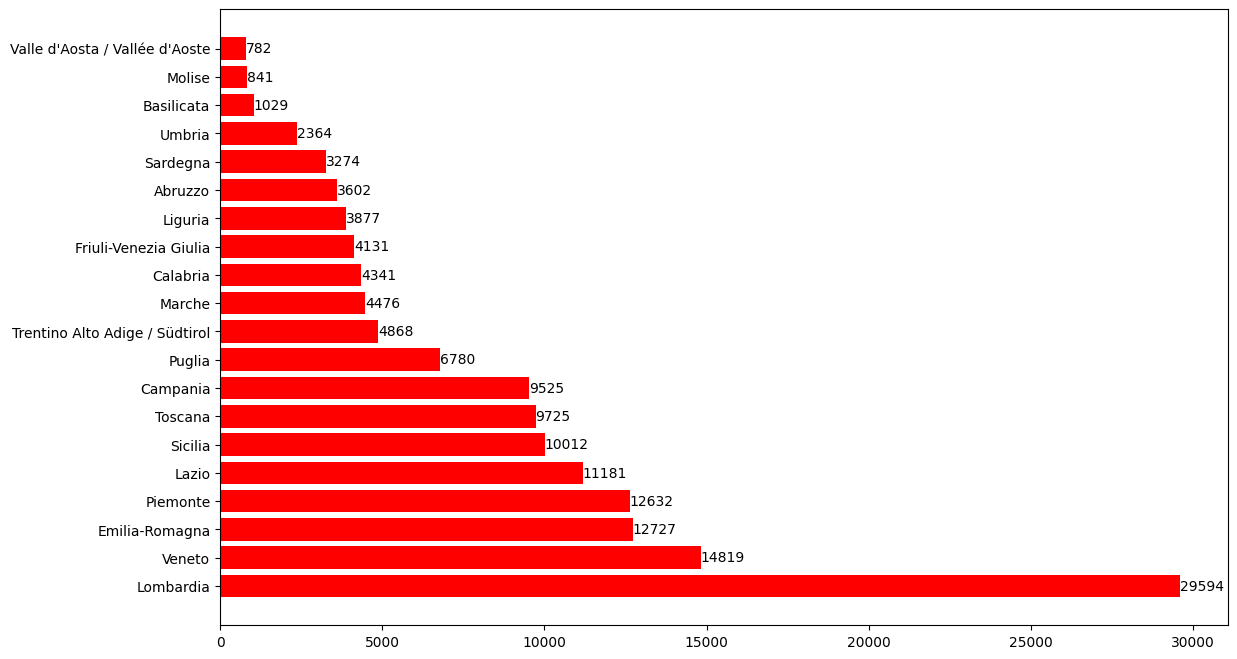

In [19]:
#Questo codice genera un grafico che analizza le regioni italiane  con il maggior numero di emigrati.

# Dati da cercare all'interno del DataFrame.
Territori_da_cercare = ['Abruzzo', 'Basilicata', 'Molise', 'Lazio', 'Campania', 'Puglia',
                         'Calabria', 'Sicilia', 'Sardegna', 'Lombardia', 'Veneto',
                           'Friuli-Venezia Giulia', "Trentino Alto Adige / Südtirol", 'Piemonte',
                             'Valle d\'Aosta / Vallée d\'Aoste', 'Liguria', 'Emilia-Romagna',
                               'Marche', 'Umbria', 'Toscana']

Paese_di_destinazione = ['Mondo']
Paese_di_cittadinanza = ['Totale']
Sesso = ['totale']
Età = ['totale']

Età_1 = ['TOTAL']
stato_C = ['totale']

# Filtra il DataFrame df3 in base ai criteri specificati.
dati_filtrati = df3 [(df3['Territorio di origine'].isin(Territori_da_cercare)) &
                    (df3['Stato estero di  destinazione'].isin(Paese_di_destinazione)) &
                    (df3['Paese di cittadinanza'].isin(Paese_di_cittadinanza)) &
                    (df3['Sesso'].isin(Sesso)) &
                    (df3['Età'].isin(Età))
                    ]

# Raggruppa i dati filtrati per la colonna 'Territorio di destinazione' e somma i valori nella colonna 'Value'.
classificazione_per_regione = dati_filtrati.groupby('Territorio di origine')['Value'].sum().reset_index()
classificazione_ordinata = classificazione_per_regione.sort_values(by='Value', ascending=False)

# Crea un diagramma a barre.
colori = ['red']
plt.figure(figsize=(13, 8))

plt.barh(classificazione_ordinata['Territorio di origine'],classificazione_ordinata['Value'], color=colori)

for index, value in enumerate(classificazione_ordinata['Value']):
    plt.text(value, index, str(value), ha='left', va='center')

plt.yticks(range(len(classificazione_ordinata)), classificazione_ordinata['Territorio di origine'])

plt.show()

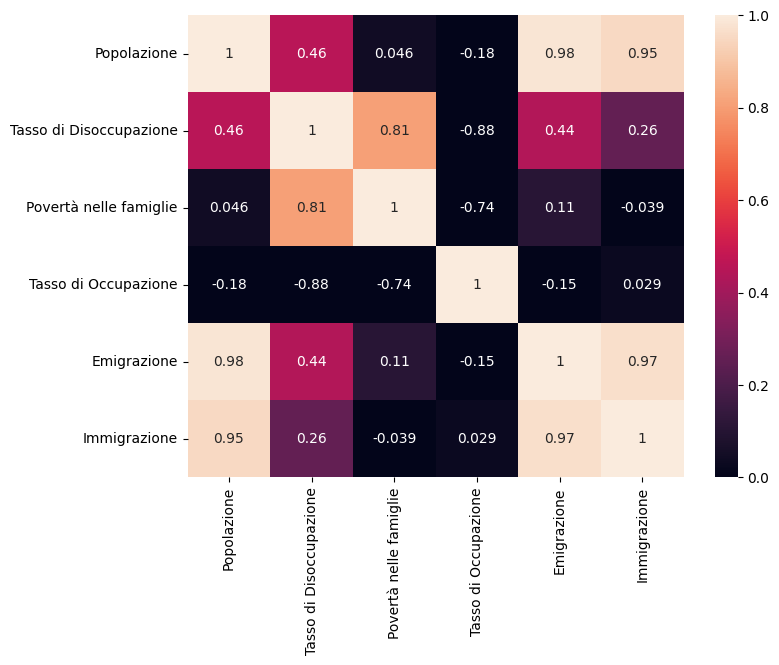

In [20]:
#Questo codice genera un grafico che esplora la correlazione tra l'immigrazione e l'emigrazione 
#nella regione del Sud, evidenziando alcune delle cause che possono contribuire a questo fenomeno.

# Dati da cercare all'interno dei DataFrame.
Territori_da_cercare = ['Calabria','Campania','Puglia','Molise',
                        'Sicilia','Basilicata','Lazio','Abruzzo','Sardegna ']

sesso = ['totale']
Età = ['TOTAL']
stato_C = ['totale']

Età_1 = ['Y15-74']
Data = ['2022']

Paese_di_destinazione = ['Mondo']
Paese_di_cittadinanza = ['Totale']
Età_2 = ['totale']

Titolo_di_studio = ['totale']
Data = ['2022']

iso= ['TOTAL']

# Filtra i DataFrames df6, df5, df3, df7, df8, df4 in base ai criteri specificati.
dati_filtrati = df6 [(df6['Territorio'].isin(Territori_da_cercare)) &
                    (df6['Sesso'].isin(sesso)) &
                    (df6['ETA1'].isin(Età)) &
                    (df6['Stato civile'].isin(stato_C))
                    ]

dati_filtrati_1 = df5 [(df5['Territorio'].isin(Territori_da_cercare)) &
                    (df5['Sesso'].isin(sesso)) &
                    (df5['ETA1'].isin(Età_1)) &
                    (df5['TIME'].isin(Data))
                    ]

dati_filtrati_2 = df3 [(df3['Territorio di origine'].isin(Territori_da_cercare)) &
                    (df3['Stato estero di  destinazione'].isin(Paese_di_destinazione)) &
                    (df3['Paese di cittadinanza'].isin(Paese_di_cittadinanza)) &
                    (df3['Sesso'].isin(sesso)) &
                    (df3['Età'].isin(Età_2))
                    ]

dati_filtrati_3 = df7 [(df7['Territorio'].isin(Territori_da_cercare))]

dati_filtrati_4 = df8 [(df8['Territorio'].isin(Territori_da_cercare)) &
                    (df8['Sesso'].isin(sesso)) &
                    (df8['ETA1'].isin(Età_1)) &
                    (df8['TIME'].isin(Data)) &
                    (df8['Titolo di studio'].isin(Titolo_di_studio)) &
                    (df8['Seleziona periodo'].isin(Data))
                    ]

dati_filtrati_5 = df4 [(df4['Territorio di di destinazione'].isin(Territori_da_cercare)) &
                    (df4['Sesso'].isin(sesso)) &
                    (df4['Età'].isin(Età_2)) &
                    (df4['ISO'].isin(iso))
                    ]

# Raggruppa i dati filtrati per la colonna Territorio, e Territorio di origine.
dati_finali = dati_filtrati.groupby('Territorio')['Value'].sum().reset_index(name='Popolazione')
dati_finali_1 = dati_filtrati_1.groupby('Territorio')['Value'].mean().reset_index(name='Tasso di Disoccupazione')
dati_finali_2 = dati_filtrati_2.groupby('Territorio di origine')['Value'].sum().reset_index(name='Emigrazione')
dati_finali_3 = dati_filtrati_3.groupby('Territorio')['Value'].sum().reset_index(name='Povertà nelle famiglie')
dati_finali_4 = dati_filtrati_4.groupby('Territorio')['Value'].sum().reset_index(name='Tasso di Occupazione')
dati_finali_5 = dati_filtrati_5.groupby('Territorio di di destinazione')['Value'].sum().reset_index(name='Immigrazione')

# Creazione di un singolo DataFrame.
merged_df = pd.merge(dati_finali, dati_finali_1, on='Territorio')
merged_df = pd.merge(merged_df, dati_finali_3, on='Territorio')
merged_df = pd.merge(merged_df, dati_finali_4, on='Territorio')
merged_df = pd.merge(merged_df, dati_finali_2, left_on='Territorio', right_on='Territorio di origine')
merged_df = pd.merge(merged_df, dati_finali_5, left_on='Territorio', right_on='Territorio di di destinazione')

# Seleziona ogni tipo di colonne numeriche da 'merged_df'.
numeric_columns = merged_df.select_dtypes(include=['float64','int64']).columns

# Crea una matrice di correlazione.
correlation_matrix = merged_df[numeric_columns].corr()

# Visualizza una heatmap della matrice di correlazione.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, vmin=0, vmax=1)
plt.show()



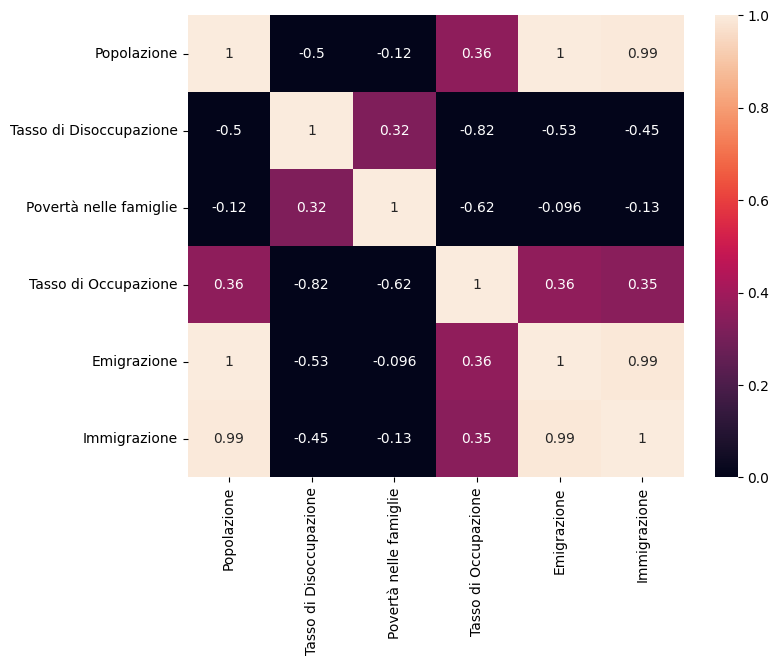

In [21]:
#Questo codice genera un grafico che esplora la correlazione tra l'immigrazione e l'emigrazione 
#nella regione del Nord, evidenziando alcune delle cause che possono contribuire a questo fenomeno.

# Dati da cercare all'interno dei DataFrame.
Territori_da_cercare = ['Lombardia', 'Veneto','Friuli-Venezia Giulia', 
                            "Trentino Alto Adige / Südtirol", 'Piemonte',
                             'Valle d\'Aosta / Vallée d\'Aoste', 'Liguria', 'Emilia-Romagna',
                               'Marche', 'Umbria', 'Toscana']

sesso = ['totale']
Età = ['TOTAL']
stato_C = ['totale']

Età_1 = ['Y15-74']
Data = ['2022']

Paese_di_destinazione = ['Mondo']
Paese_di_cittadinanza = ['Totale']
Età_2 = ['totale']

Titolo_di_studio = ['totale']
Data = ['2022']

iso= ['TOTAL']

# Filtra i DataFrames df6, df5, df3, df7, df8, df4 in base ai criteri specificati.
dati_filtrati = df6 [(df6['Territorio'].isin(Territori_da_cercare)) &
                    (df6['Sesso'].isin(sesso)) &
                    (df6['ETA1'].isin(Età)) &
                    (df6['Stato civile'].isin(stato_C))
                    ]

dati_filtrati_1 = df5 [(df5['Territorio'].isin(Territori_da_cercare)) &
                    (df5['Sesso'].isin(sesso)) &
                    (df5['ETA1'].isin(Età_1)) &
                    (df5['TIME'].isin(Data))
                    ]

dati_filtrati_2 = df3 [(df3['Territorio di origine'].isin(Territori_da_cercare)) &
                    (df3['Stato estero di  destinazione'].isin(Paese_di_destinazione)) &
                    (df3['Paese di cittadinanza'].isin(Paese_di_cittadinanza)) &
                    (df3['Sesso'].isin(sesso)) &
                    (df3['Età'].isin(Età_2))
                    ]

dati_filtrati_3 = df7 [(df7['Territorio'].isin(Territori_da_cercare))]

dati_filtrati_4 = df8 [(df8['Territorio'].isin(Territori_da_cercare)) &
                    (df8['Sesso'].isin(sesso)) &
                    (df8['ETA1'].isin(Età_1)) &
                    (df8['TIME'].isin(Data)) &
                    (df8['Titolo di studio'].isin(Titolo_di_studio)) &
                    (df8['Seleziona periodo'].isin(Data))
                    ]

dati_filtrati_5 = df4 [(df4['Territorio di di destinazione'].isin(Territori_da_cercare)) &
                    (df4['Sesso'].isin(sesso)) &
                    (df4['Età'].isin(Età_2)) &
                    (df4['ISO'].isin(iso))
                    ]

# Raggruppa i dati filtrati per la colonna Territorio, e Territorio di origine.
dati_finali = dati_filtrati.groupby('Territorio')['Value'].sum().reset_index(name='Popolazione')
dati_finali_1 = dati_filtrati_1.groupby('Territorio')['Value'].mean().reset_index(name='Tasso di Disoccupazione')
dati_finali_2 = dati_filtrati_2.groupby('Territorio di origine')['Value'].sum().reset_index(name='Emigrazione')
dati_finali_3 = dati_filtrati_3.groupby('Territorio')['Value'].mean().reset_index(name='Povertà nelle famiglie')
dati_finali_4 = dati_filtrati_4.groupby('Territorio')['Value'].mean().reset_index(name='Tasso di Occupazione')
dati_finali_5 = dati_filtrati_5.groupby('Territorio di di destinazione')['Value'].sum().reset_index(name='Immigrazione')

# Creazione di un singolo DataFrame.
merged_df = pd.merge(dati_finali, dati_finali_1, on='Territorio')
merged_df = pd.merge(merged_df, dati_finali_3, on='Territorio')
merged_df = pd.merge(merged_df, dati_finali_4, on='Territorio')
merged_df = pd.merge(merged_df, dati_finali_2, left_on='Territorio', right_on='Territorio di origine')
merged_df = pd.merge(merged_df, dati_finali_5, left_on='Territorio', right_on='Territorio di di destinazione')

# Seleziona ogni tipo di colonne numeriche da 'merged_df'.
numeric_columns = merged_df.select_dtypes(include=['float64','int64']).columns

# Crea una matrice di correlazione.
correlation_matrix = merged_df[numeric_columns].corr()

# Visualizza una heatmap della matrice di correlazione.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, vmin=0, vmax=1)
plt.show()

